<a href="https://colab.research.google.com/github/BrajanNieto/MISTI/blob/main/2026_Housing_ModelFittingandValidation%5BStudent%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you haven't already, please hit :**

`File` -> `Save a Copy in Drive`

**to copy this notebook to your Google drive, and work on a copy. If you don't do this, your changes won't be saved!**

# Model Training and Validation with the California Dataset

In [4]:
# Python libraries for scientific computing and data manipulation
import numpy as np  # Provides multidimensional array object and mathematical operations
import pandas as pd  # Offers data structures and operations for manipulating numerical tables and time series

# Libraries for data visualization
import matplotlib.pyplot as plt  # A comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns  # Extends Matplotlib’s functionality with a high-level interface for drawing attractive statistical graphics

# Scikit-learn: machine learning library
from sklearn.linear_model import LinearRegression  # Class implementing ordinary least-squares linear regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet  # Regularized linear models to reduce overfitting and improve generalization

# Tools for data splitting, model evaluation, and scaling
from sklearn.model_selection import train_test_split  # Splits arrays or matrices into random train and test subsets
from sklearn.metrics import mean_squared_error  # Calculates the mean squared error for regression models
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance

# Sample dataset: California housing
from sklearn.datasets import fetch_openml  # Function to fetch the California housing dataset for regression tasks

## Load the California Housing Dataset

First, we load the california housing dataset. You can explore the dataset a bit from the output of either `print(california_housing.DESCR)` or `california_housing_df.describe()` when the data is put into a dataframe.

In [ ]:
california_housing = fetch_openml(name="california_housing", version=1, as_frame=True)
print(california_housing.DESCR)

In [ ]:
# for simplicity, we drop the ocean_proximity column since it's a categorical variable (could one-hot encode)
# also drop all rows with any NaN values
california_housing_df = california_housing.frame.drop(columns=['ocean_proximity']).dropna()
# divide median_house_value by $100,000 for better readability
california_housing_df['median_house_value'] = california_housing_df['median_house_value'] / 100_000

california_housing_df.describe()

## EXERCISE: Fit a LinearRegression Model

Here, we will fit a simple linear regression on the california housing dataset.

Tasks:
1. Load your input data into a variable `X` using the `california_housing_df` variable. Next, load your target variable data into a variable `y` using the `california_housing_df` variable.
2. Train a LinearRegression() model predicting `y` using all input features `X`. Print the r-squared value as well as the mean squared error using the LinearRegression() class's `.score(~)` method and the loaded `mean_squared_error(~)` function. *Remember, for mean squared error, you will need to compare the the predicted target using the model versus the actual target.*
3. Visualize your model predictions. Make sure you understand the plot. *Remember, you cannot directly plot high-dimensional data, but we can visualize the predictions on test data.*


### TASK 1: Load input and target variables

In [7]:
# TASK 1 EXERCISE

# Select features and target variable
X = california_housing_df.drop(columns=['median_house_value'])
y = california_housing_df['median_house_value']

### TASK 2: Train a model without splitting your data

In [11]:
# TASK 2 EXERCISE

# Train and evaluate the model on the entire dataset
model_no_split = LinearRegression() # instantiate your model
model_no_split.fit(X, y)
y_pred_no_split = model_no_split.predict(X) # using your model, predict the target variable
r_squared_no_split = model_no_split.score(X,y)
mse_no_split = mean_squared_error(y, y_pred_no_split)

print(f"Without splitting the data:")
print(f"R-squared: {r_squared_no_split}")
print(f"Mean Squared Error: {mse_no_split}\n")

Without splitting the data:
R-squared: 0.6369116857335633
Mean Squared Error: 0.48380577796400165



### TASK 3: Visualize your Model Fit (True y vs. Predicted y)

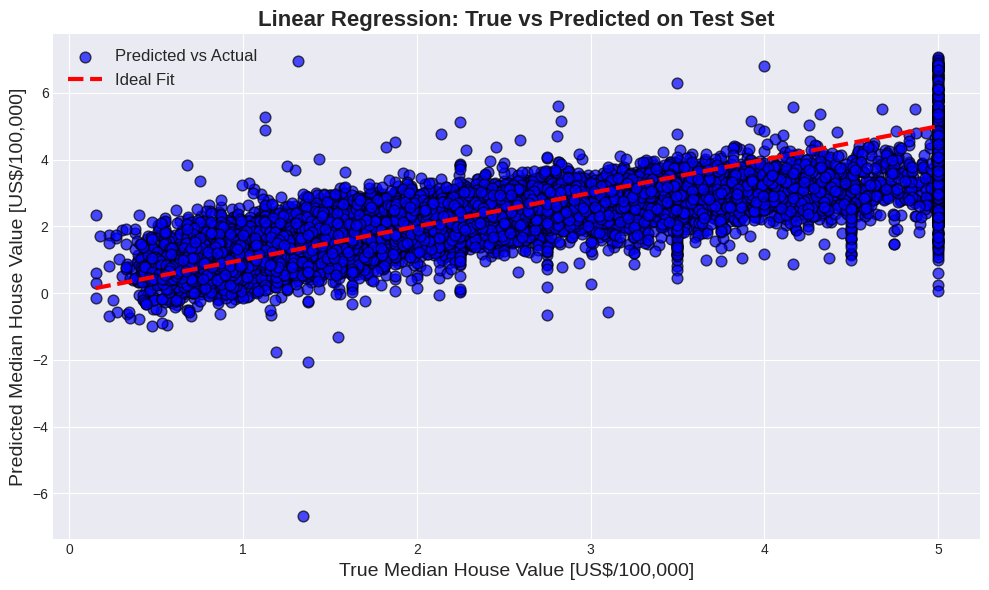

In [12]:
# TASK 3 SOLUTION AND EXERCISE

# Visualize the Results --------------------------------------------------------
# You cannot directly plot high-dimensional data, but we can visualize the predictions on test data

# Plot the true vs. predicted values for the test set with enhancements
plt.style.use('seaborn-v0_8-darkgrid')  # Switch to a cleaner, modern style
plt.figure(figsize=(10, 6))

# Scatter plot for the true vs predicted values with larger markers
plt.scatter(y, y_pred_no_split, color='blue', edgecolor='k', alpha=0.7, s=60, label='Predicted vs Actual')

# Add the ideal fit line
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=3, label='Ideal Fit')

# Add gridlines for better readability
plt.grid(True)

# Enhanced labels and title with increased font size and clarity
plt.xlabel('True Median House Value [US$/100,000]', fontsize=14)
plt.ylabel('Predicted Median House Value [US$/100,000]', fontsize=14)
plt.title('Linear Regression: True vs Predicted on Test Set', fontsize=16, fontweight='bold')

# Customize the legend for better readability
plt.legend(loc='upper left', fontsize=12)

# Adjust layout for a cleaner appearance
plt.tight_layout()

# Show the plot
plt.show()

## EXERCISE: Why do we need to do train-test splitting prior to fitting a machine learning model?

In this exercise, we will explore how train-test splitting helps us build more robust and reliable machine learning models by preventing overfitting and ensuring our model can generalize well to new data.

Tasks:
1. Split the dataset into training and testing sets using the `train_test_split(~)` function, and then fit the model again. Again, print the r-squared value as well as the mean squared error using the LinearRegression() class's `.score(~)` method and the loaded `mean_squared_error(~)` function. Compare the r-squared values between each model.
2. Visualize your model predictions. Make sure you understand the plot. *Remember, you cannot directly plot high-dimensional data, but we can visualize the predictions on test data.*


### TASK 1: Split your Data into Training and Testing Sets then fit a LinearRegression Model

In [14]:
# TASK 1 EXERCISE

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model_split = LinearRegression()
model_split.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test_split = model_split.predict(X_test) # using your model, predict the target variable
r_squared_split = model_split.score(X_test, y_test)
mse_split = mean_squared_error(y_test, y_pred_test_split)

print(f"With splitting the data:")
print(f"R-squared: {r_squared_split}")
print(f"Mean Squared Error: {mse_split}")

With splitting the data:
R-squared: 0.6400865688993728
Mean Squared Error: 0.4921881237628158


### TASK 2: Visualize your Model Fit (True y vs. Predicted y)

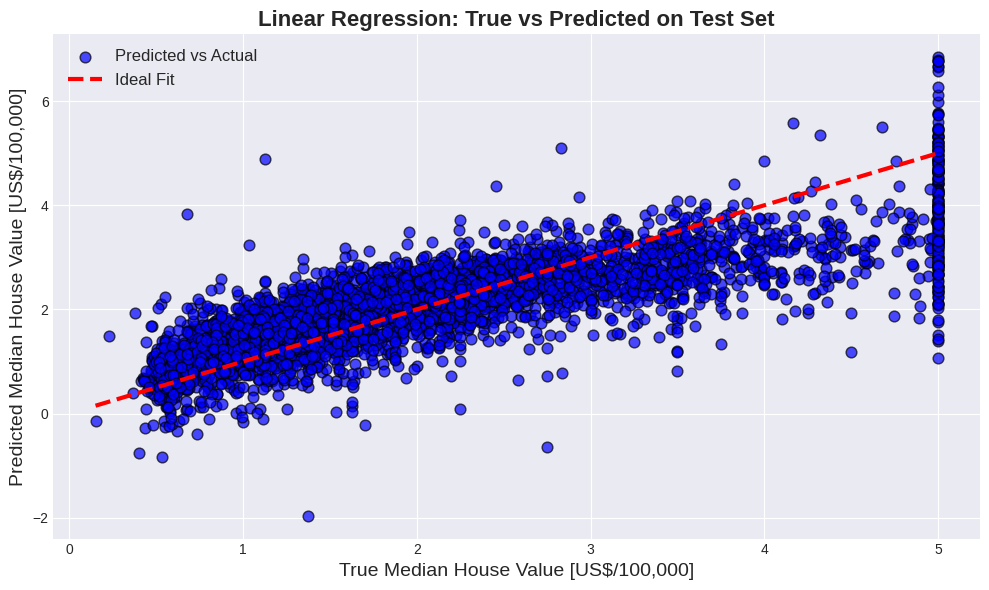

In [15]:
# TASK 2 SOLUTION AND EXERCISE

# Visualize the Results --------------------------------------------------------
# You cannot directly plot high-dimensional data, but we can visualize the predictions on test data

# Plot the true vs. predicted values for the test set with enhancements
plt.style.use('seaborn-v0_8-darkgrid')  # Switch to a cleaner, modern style
plt.figure(figsize=(10, 6))

# Scatter plot for the true vs predicted values with larger markers
plt.scatter(y_test, y_pred_test_split, color='blue', edgecolor='k', alpha=0.7, s=60, label='Predicted vs Actual')

# Add the ideal fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3, label='Ideal Fit')

# Add gridlines for better readability
plt.grid(True)

# Enhanced labels and title with increased font size and clarity
plt.xlabel('True Median House Value [US$/100,000]', fontsize=14)
plt.ylabel('Predicted Median House Value [US$/100,000]', fontsize=14)
plt.title('Linear Regression: True vs Predicted on Test Set', fontsize=16, fontweight='bold')

# Customize the legend for better readability
plt.legend(loc='upper left', fontsize=12)

# Adjust layout for a cleaner appearance
plt.tight_layout()

# Show the plot
plt.show()


## EXERCISE: Explore Different Types of Linear Regression from an Optimization Perspective

In this exercise, we will explore different types of linear regression and compare their performance and coefficients.

Tasks:
1. Standardize your data using the `StandardScaler()` class, and its `.fit_transform(~)` and `.transform(~)` methods. Standardizing the data is an important preprocessing step for models like Ridge, Lasso, and Elastic Net, as they are sensitive to the scale of input features.
2. Fit a standard `LinearRegression()`: Use the scaled input data to train and evaluate a standard Linear Regression model (no regularization).
3. Fit a `Ridge()` regression: Train and evaluate a Ridge Regression model, adjusting the regularization parameter `alpha` as needed.
4. Fit a `Lasso()` regression: Train and evaluate a Lasso Regression model, using the `alpha` parameter for regularization.
5. Fit an ElasticNet() regression: Train and evaluate an Elastic Net Regression model, using both `alpha` (regularization strength) and `l1_ratio` (balance between L1 and L2 regularization).
6. Visualize model coefficients: Compare the coefficients from Linear, Ridge, Lasso, and Elastic Net regressions in a single plot. Extract the coefficients from each trained model. Each model has a `.coef_` attribute that stores its coefficients. Combine these coefficients into a single array for easy visualization. Use `np.array()` to create a 2D array, where each row corresponds to a model’s coefficients.
7. Intepret the varied regression fits: Compare the predictions of all models (Linear, Ridge, Lasso, and Elastic Net) against the true values on the test data.

### TASK 1: Standardize your data

In [17]:
# TASK 1 EXERCISE

# Standardize your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### TASK 2: Fit Linear Regression (No Regularization)


In [18]:
# TASK 2 EXERCISE

# Fit a Linear Regression model without regularization
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

r_sq_linear_train = linear_model.score(X_train_scaled, y_train)
r_sq_linear_test = linear_model.score(X_test_scaled, y_test)
print(f'Linear Regression - Training R²: {r_sq_linear_train}, Test R²: {r_sq_linear_test}')

Linear Regression - Training R²: 0.6360185727313742, Test R²: 0.6400865688993735


### TASK 3: Fit Ridge Regression

In [27]:
# TASK 3 EXERCISE

# Fit a Ridge Regression model
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train_scaled, y_train)

r_sq_ridge_train = ridge_model.score(X_train_scaled, y_train)
r_sq_ridge_test = ridge_model.score(X_test_scaled, y_test)
print(f'Ridge Regression - Training R²: {r_sq_ridge_train}, Test R²: {r_sq_ridge_test}')

Ridge Regression - Training R²: 0.6360184856169138, Test R²: 0.6400807621481854


### TASK 4: Fit Lasso Regression


In [31]:
# TASK 4 EXERCISE

# Fit a Lasso Regression model
lasso_model = Lasso(alpha = 0.05)
lasso_model.fit(X_train_scaled, y_train)

r_sq_lasso_train = lasso_model.score(X_train_scaled, y_train)
r_sq_lasso_test = lasso_model.score(X_test_scaled, y_test)
print(f'Lasso Regression - Training R²: {r_sq_lasso_train}, Test R²: {r_sq_lasso_test}')

Lasso Regression - Training R²: 0.5505845960115867, Test R²: 0.5479309008107174


### TASK 5: Fit Elastic Net Regression

In [32]:
# TASK 5 EXERCISE

# Fit an Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

r_sq_elastic_train = elastic_net_model.score(X_train_scaled, y_train)
r_sq_elastic_test = elastic_net_model.score(X_test_scaled, y_test)
print(f'Elastic Net - Training R²: {r_sq_elastic_train}, Test R²: {r_sq_elastic_test}')

Elastic Net - Training R²: 0.6331528075006312, Test R²: 0.6355688406647576


### TASK 6: Visualize Model Coefficients for Comparison

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (9).

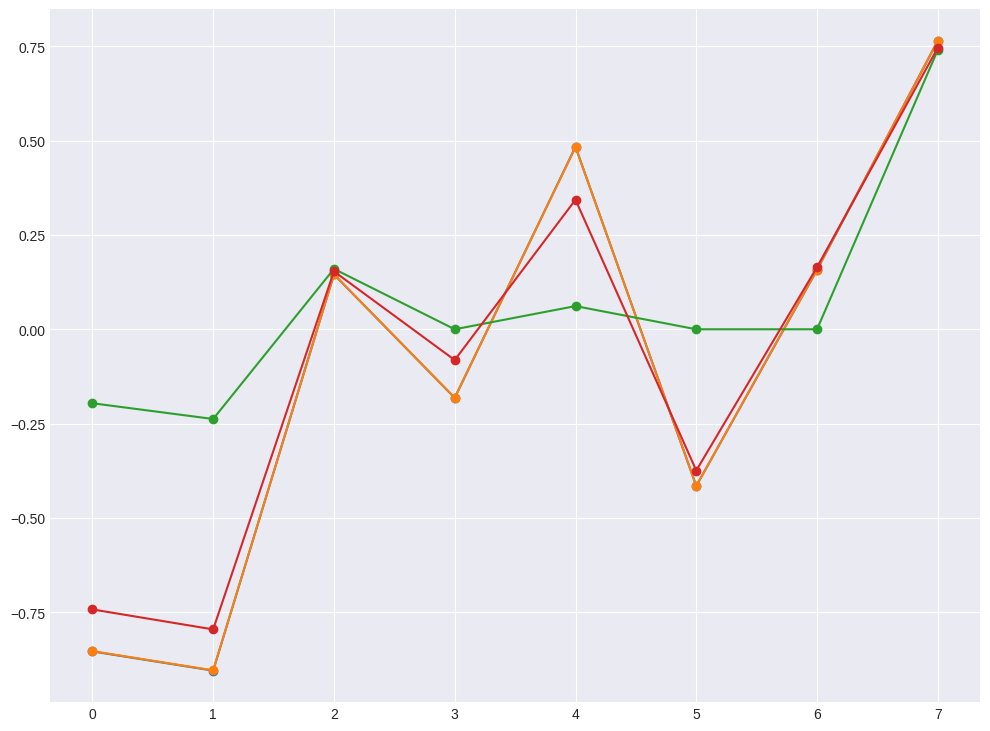

In [35]:
# TASK 6 EXERCISE

# Visualize the coefficients for all models
coefficients = np.array([
    linear_model.coef_,      # Coeficientes de Regresión Lineal Estándar
    ridge_model.coef_,         # Coeficientes de Ridge
    lasso_model.coef_,         # Coeficientes de Lasso
    elastic_net_model.coef_    # Coeficientes de Elastic Net
])

plt.figure(figsize=(12, 9))
plt.plot(coefficients.T, marker='o')
plt.xticks(np.arange(X_train.shape[1]), california_housing.feature_names, rotation=90)
plt.title('Comparison of Coefficients Across Linear, Ridge, Lasso, and Elastic Net')
plt.legend(['Linear', 'Ridge', 'Lasso', 'Elastic Net'])
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

### TASK 7: Visualize the Differences in the Regression Fits with and without Regularization

In [ ]:
# TASK 7 SOLUTION AND EXERCISE

# Visualize Predictions on Test Data for All Models ----------------------------
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_elastic = elastic_net_model.predict(X_test_scaled)

# Plot True vs Predicted for All Models
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='black', s=10, label='Linear Predictions')
plt.scatter(y_test, y_pred_ridge, color='blue', s=10, label='Ridge Predictions')
plt.scatter(y_test, y_pred_lasso, color='green', s=10, label='Lasso Predictions')
plt.scatter(y_test, y_pred_elastic, color='orange', s=10, label='Elastic Net Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', lw=2, label='Ideal Fit')

plt.xlabel('True Median House Value [US$/100,000]')
plt.ylabel('Predicted Median House Value [US$/100,000]')
plt.title('True vs Predicted Values (Linear, Ridge, Lasso, Elastic Net)')
plt.legend()
plt.show()